# Machine Learning A-Z Python

## Regression

## Part 3. Polynomial Regression (Continuous regression)

**Problem:** A new employee is going to be hired. He claims to be paid $160k in his previous company.
The hiring company HR wants to check the salary of the candidate by calling his previous company. However, He only manages to get the range of salaries of the candidate's previous company. Once plotted in excel it looked
like polynomial regression.

This guy is working as regional manager there (for 2 years so level ~6.5). HR thus thinks his 
salary is around $150k as a regional manager and he is bluffing about his salary. Lets do a 
polynomial regression and see what is TRUE?

In [47]:
# Data Preprocessing

# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset=pd.read_csv('Position_Salaries.csv')
print(dataset.head(10))

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [48]:
# Independent variable: Level
X=dataset.iloc[:,1:-1].values # Don't require position column, similar to level column
X.shape

(10, 1)

In case of only 1 column as we saw in simple linear regression, 
we have to use [:-1] for column selection in X because we want X to form a matrix.
Where as y should be (10,) because we want it to be a vector and not matrix.

In [49]:
# Dependent variable: Salary
y=dataset.iloc[:,-1].values 
y.shape

(10,)

In [50]:
print(X[:5]) # confirm it do NOT have dependent variable 
print('------------------------------------')
print(y[:5]) # confirm it only contain  dependent variable
print(X.ndim, y.ndim)

[[1]
 [2]
 [3]
 [4]
 [5]]
------------------------------------
[ 45000  50000  60000  80000 110000]
2 1


In [51]:
# No missing data and no categorical columns

**Very rare case of NOT splitting the data, because we have very limited observation.
We need to use as much of information to predict the salary**.

In case of a real world dataset, we need to split data into training and test set (similar to what we did in previous notebook)

In [52]:
# NO Feature scaling required here

This is because we will be using the same library that we use for linear regression. This library does the feature scaling itself to make more accurate predictions. And therefore, no need to perform feature scaling separately.

In [53]:
# Fitting linear regression to dataset: to compare both linear & polynomial regression results
from sklearn.linear_model import LinearRegression 
# LinearRegression class from linear_model library

lin_regressor = LinearRegression() 
# Instantiate LinearRegression by creating an object

lin_regressor.fit(X, y) # fitting to X and y as we did not split data here

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

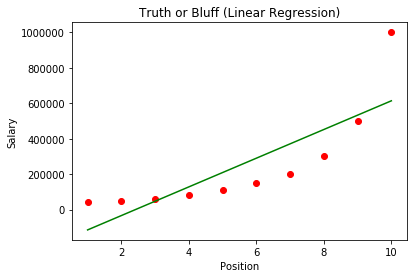

In [54]:
# Visualizing the Linear Regression results_compare with Polynomial
plt.scatter(X, y, color='red')

# To plot the linear regression line
plt.plot(X, lin_regressor.predict(X), color='green')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

**Observed points are red points, prediction is in green line.**

Prediction is forming a straight line as this is a linear regression model.

**Result:** 

**Linear Regression prediction is NOT good**, we see observed points are far from predicted points (predicted 
points formed the green line) in the linear regression model. eg- CEO observed salary is 1Million dollar. 
But predicted is 650k dollar. So if we use linear regression model to check CEO's salary, then it wont be correct. 
Or the person in question would earn $300k according to this model.
So we have to improve the linear model such that the predicted line matches
better with observed points

In [55]:
# Fitting polynomial regression to dataset: to compare both linear & polynomial regression results
from sklearn.preprocessing import PolynomialFeatures # class is PolynomialFeatures which is in preprocessing library

poly_regressor = PolynomialFeatures(degree=2) 

**PolynomialFeatures class provides the tool to incorporate some polynomial term in the linear regression equation**

Poly_regressor object will be a transformer tool that will transform our matrix of feature `X` into new matrix of features `X_poly` which will contain independent variable present in `X` and it's polynomial term. Then we can fit linear regression model into `X_poly` again. 

Start with no. of degrees=2 and then increase the number to make the polynomial regression line a 
better fit to the observed line.

No of degrees will add that many columns to X matrix. For degrees = 2, X goes from 1 column 
to 1+2=3 column of X_poly. Out of the 2, one column will be for bo, another column will be 
polynomial i.e. X1^2

Here poly_regressor will transform matrix of feature X1 into a new matrix of features 
named X_poly. 

X_poly will contain not only X1, but also  X1^2, X1^3, X^n (as much 
^ as we want by changing number of degrees)

In [56]:
# fit the object poly_regressor to X and then transform X into X_poly
X_poly = poly_regressor.fit_transform(X)

In [57]:
# Now compare X and X_poly
print(X.shape)
print('------------') 
print(X_poly.shape)

(10, 1)
------------
(10, 3)


In [58]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [59]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

**Now compare X and X_poly**

The independent variable or X1 (or original X column) is the middle column (column_index=1) in X_poly. 
Then 3rd column (column_index=2) in X_poly is ^2 of middle column of X_poly (or original X column).
Thus X_poly 3rd column is the polynomial term.
X_poly first column (column_index=0) has a constant value of 1. 

**So here poly_regressor object has 
created `bo` constant automatically, which we had to seperately add in the case of multiple 
linear regression.**

In [60]:
# poly_regressor fit into a linear egression model by incorporting X_poly which contains polynomial feature
lin_regressor2 = LinearRegression() 
lin_regressor2.fit(X_poly, y) 

# Now polynomial model is created and ready to say Truth or bluff about the salary claimed?

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

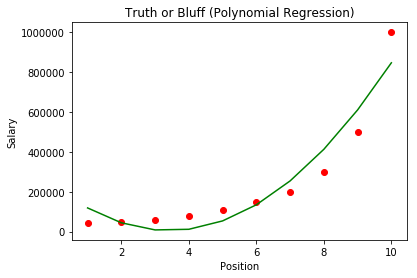

In [61]:
# Visualizing the Polynomial Regression results_compare with Linear regression
plt.scatter(X, y, color='red')

# To plot the Polynomial regression line
plt.plot(X, lin_regressor2.predict(poly_regressor.fit_transform(X)), 
         color='green')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

`poly_regressor.fit_transform(X)` will convert X matrix of features into `X_poly`.

`lin_regressor2.predict` will predict the dependent variable based on `X_poly`.

we can use `plt.plot(X, lin_regressor2.predict(X_poly), color='green')`
but to make this visualization code for polynomial self-sufficient to be used later we 
replaced `X_poly` with original code that can work for any X matrix.

**RESULT:**

**Green predicted line is curved beacuse of polynomial regression model.**

And this predicted
line is fitting much better to the observed points (unlike linear regression model). 
According to the polynomial regrssion, CEO should have a salary close to dollar 900 k, and the person
in question (6.5 position) to be hired should have a salary close to dollar 200k (way better than linear model 
prediction of dollar 300k). So looks like this person is honest.

## **MODEL IMPROVEMENT:** 
    
Although polynomial regression model predicted line fits better than linear regression.
but still its NOT great. 

We know model is correct as the regression (predicted) line is following the observed points. But we can fine-tune the model for a better fit by the following:

** 2 ways model can be improved **

1> MODEL OPTIMIZATION: Increasing no. of degrees

2> MODEL OPTIMIZATION: Reducing step size of the plot

### Optimization 1. Increasing no. of degrees

In [62]:
# Increase number of degrees to 3
poly_regressor = PolynomialFeatures(degree=3)

# fit the object poly_regressor to X and then transform X into X_poly
X_poly = poly_regressor.fit_transform(X)

# Now compare X and X_poly
print(X.shape)
print('------------') 
print(X_poly.shape)
print('------------') 
print(X)
print('---------------------------') 
print(X_poly)

(10, 1)
------------
(10, 4)
------------
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
---------------------------
[[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]
 [   1.    6.   36.  216.]
 [   1.    7.   49.  343.]
 [   1.    8.   64.  512.]
 [   1.    9.   81.  729.]
 [   1.   10.  100. 1000.]]


X_poly first column is bo (constant=1), 2nd column is original X value, 3rd column is x^2, 4th column is x^3

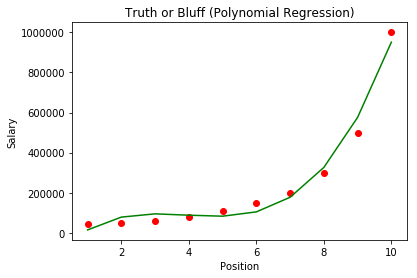

In [63]:
# Include this poly_regressor fit into a linear regression model
lin_regressor2 = LinearRegression() 
lin_regressor2.fit(X_poly, y) 

# Visualizing the Polynomial Regression results (compare with Linear regression)
plt.scatter(X, y, color='red')

# To plot the Polynomial regression line
plt.plot(X, lin_regressor2.predict(poly_regressor.fit_transform(X)), 
         color='green')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

** Result: **
It fits better than NOT only linear regression, but polynomial regression with degrees 3 fit better to observed points than polynomial regression with degrees 2.

(10, 1)
------------
(10, 5)
------------
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
---------------------------
[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]
---------------------------
X_poly first column is bo (constant=1), 2nd column is original X value, 3rd column X^2, 4th column X^3, 5th column X^4


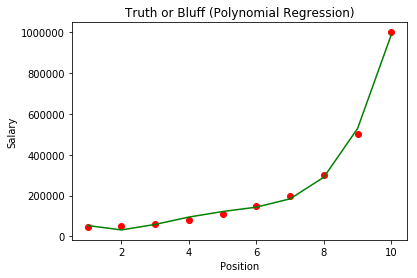

In [64]:
# Increase number of degrees to 4
poly_regressor = PolynomialFeatures(degree=4)

# fit the object poly_regressor to X and then transform X into X_poly
X_poly = poly_regressor.fit_transform(X)

# Now compare X and X_poly
print(X.shape)
print('------------') 
print(X_poly.shape)
print('------------') 
print(X)
print('---------------------------') 
print(X_poly)
print('---------------------------') 
print( 'X_poly first column is bo (constant=1), 2nd column is original X value, \
3rd column X^2, 4th column X^3, 5th column X^4')

# Include this poly_regressor fit into a linear regression model
lin_regressor2 = LinearRegression() 
lin_regressor2.fit(X_poly, y) 

# Visualizing the Polynomial Regression results (compare with Linear regression)
plt.scatter(X, y, color='red')

# To plot the Polynomial regression line
plt.plot(X, lin_regressor2.predict(poly_regressor.fit_transform(X)), 
         color='green')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

** Result: **
Polynomial regression model with degrees 4 fit predicted line to observed points better than polynomial regression model with degrees 3

### Optimization 2. Changing number of steps

Even after putting degrees as 4, we see the prediction line is straight between observed points.
So we lack a continuous/smoother predicted line. We can have a continuous predicted curve by incrementing 
by 0.1 step (making it higher resolution) instead of 1 step.
Reshape the X_grid (np.arange and reshape) for this and you will see instead of 10 observation
of X, it will be 100 because now we are having 0.1 step (Because 10 observation *10=100 observation)

You will then see a real continuous prediction line fitting very well with observed points.

1
2


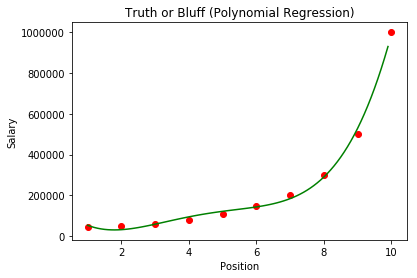

In [65]:
# Optimization 2 to make predicted line more continuous

# Visualizing the Polynomial Regression results
X_grid = np.arange(min(X),max(X),0.1) 
print(X_grid.ndim)

# But this will give a vector and for X we want matrix and therefore reshape
X_grid = X_grid.reshape(len(X_grid),1)
print(X_grid.ndim)

plt.scatter(X, y, color='red')
# To plot the Polynomial regression line
plt.plot(X_grid, lin_regressor2.predict
         (poly_regressor.fit_transform(X_grid)), color='green')

plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [66]:
# Predict the salary of the person in question by Linear Regression
print(lin_regressor.predict(X))
# Here X is similar to X_test in previous notebooks(but we didn't split data here)
# This will predict for each level of X

# If we are interested only in the salary of person in question
lin_regressor.predict((np.array([6.5]).reshape(1,1))) # experience level 6.5

[-114454.54545455  -33575.75757576   47303.03030303  128181.81818182
  209060.60606061  289939.39393939  370818.18181818  451696.96969697
  532575.75757576  613454.54545455]


array([330378.78787879])

**Result:**
According to linear regression model, this person salary should be 330k. But we know the linear regression model is not best for our dataset.

In [67]:
# Predict the salary of the person in question by Polynomial Regression
print(lin_regressor2.predict(poly_regressor.fit_transform(X)))
# Will predict for each level of X

# If we are interested only in the salary of person in question
lin_regressor2.predict(poly_regressor.fit_transform(np.array([[6.5]]))) # experience level 6.5

[ 53356.64335683  31759.90675992  58642.19114218  94632.86713289
 121724.94172501 143275.05827513 184003.49650353 289994.17249412
 528694.6386945  988916.0839159 ]


array([158862.45265158])

**Result:**
According to polynomial regression model, this person salary should be 160k. This is very close to what the person claimed. Therefore the polynomial model predicted very close and thus the person is **Honest**.

**Disclaimer**

Visualization is NOT possible when the dataset has dimension more than 2. Thus we can do the visualization in linear regression model, but NOT in multiple linear regression.

In polynomial regression we could visualize because we were fitting X_poly with linear regression model